In [1]:
import pandas as pd
# DONT USE THIS PATH BECAUSE ALL VOLUME HERE IS 0 (bug in fetch_data_using_api.py)
# processed_data_fname = "/home/devmiftahul/trading_model/from_finrl-tutorials_git/tuntun_scripts/processed_data/processed_data_135_tickers.csv"

features_csv = "/home/devmiftahul/trading_model/from_finrl-tutorials_git/tuntun_scripts/processed_data/100_tickers_with_features.csv"
processed = pd.read_csv(features_csv)
processed

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2010-01-04,151.00,151.00,147.00,148.00,1380000.0,ACES,1,0.000000,149.914214,147.085786,100.000000,-66.666667,100.000000,148.000000,148.000000,0.000000
1,2010-01-04,630.00,630.00,620.00,630.00,162000.0,ADES,1,0.000000,149.914214,147.085786,100.000000,-66.666667,100.000000,630.000000,630.000000,0.000000
2,2010-01-04,347.87,347.87,343.63,347.87,760195.0,ADHI,1,0.000000,149.914214,147.085786,100.000000,-66.666667,100.000000,347.870000,347.870000,0.000000
3,2010-01-04,6800.00,6800.00,6800.00,6800.00,17500.0,ADMF,1,0.000000,149.914214,147.085786,100.000000,-66.666667,100.000000,6800.000000,6800.000000,0.000000
4,2010-01-04,134.00,142.00,134.00,142.00,20006500.0,ADMG,1,0.000000,149.914214,147.085786,100.000000,-66.666667,100.000000,142.000000,142.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362995,2024-11-26,2550.00,2560.00,2510.00,2550.00,1474900.0,TSPC,3630,-21.482045,2718.864030,2547.135970,47.421834,-168.905306,21.868859,2654.333333,2654.666667,249.067994
362996,2024-11-26,1670.00,1685.00,1665.00,1670.00,1319700.0,ULTJ,3630,-28.982196,1780.892823,1665.107177,39.086598,-101.521955,28.780787,1769.000000,1813.500000,249.067994
362997,2024-11-26,123.00,123.00,122.00,123.00,284200.0,UNSP,3630,5.733318,142.897927,103.302073,60.280480,39.975513,21.470936,115.433333,100.516667,249.067994
362998,2024-11-26,129.00,130.00,127.00,129.00,3067800.0,WEHA,3630,-3.676446,146.304369,124.495631,43.942857,-88.149445,25.055273,142.533333,140.466667,249.067994


In [ ]:
raw_df = processed.copy()
volume_zero_count = raw_df[raw_df['volume'] == 0].groupby('tic').size()
sorted_volume_zero_count = volume_zero_count.sort_values(ascending=True)
print(f"SORTED VOLUME ZERO COUNT: {sorted_volume_zero_count}")
top_n_tic = sorted_volume_zero_count.head(100)
tickers = top_n_tic.index.tolist()
df = raw_df[raw_df["tic"].isin(tickers)]
# df

In [2]:
tickers = sorted(processed.tic.unique())
len(tickers)

100

In [3]:
days = processed["day"].unique()
len(days)

3630

In [4]:
import pandas as pd

def split_data_based_on_date(df, TRAIN_START_DATE, TRAIN_END_DATE, TEST_START_DATE, TEST_END_DATE):
    """
    Split the DataFrame into training and testing sets based on specified date ranges.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing a 'dfdate' column with date information
    TRAIN_START_DATE : str
        Start date for training data (inclusive)
    TRAIN_END_DATE : str
        End date for training data (inclusive)
    TEST_START_DATE : str
        Start date for testing data (inclusive)
    TEST_END_DATE : str
        End date for testing data (inclusive)
    
    Returns:
    --------
    train_df : pandas.DataFrame
        DataFrame containing training data
    test_df : pandas.DataFrame
        DataFrame containing testing data
    """
    # Ensure the dfdate column is in datetime format
    df['dfdate'] = pd.to_datetime(df['date'])
    
    # Create boolean masks for training and testing data
    train_mask = (df['dfdate'] >= TRAIN_START_DATE) & (df['dfdate'] <= TRAIN_END_DATE)
    test_mask = (df['dfdate'] >= TEST_START_DATE) & (df['dfdate'] <= TEST_END_DATE)
    
    # Split the data
    train_df = df[train_mask].copy()
    test_df = df[test_mask].copy()
    
    # Validate the splits
    print(f"Training data range: {train_df['dfdate'].min()} to {train_df['dfdate'].max()}")
    print(f"Training data shape: {train_df.shape}")
    print(f"\nTesting data range: {test_df['dfdate'].min()} to {test_df['dfdate'].max()}")
    print(f"Testing data shape: {test_df.shape}")
    
    return train_df, test_df

# Example usage:
TRAIN_START_DATE = '2020-01-01'
TRAIN_END_DATE = '2022-12-31'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2023-12-31'
train_processed, test_processed = split_data_based_on_date(processed, TRAIN_START_DATE, TRAIN_END_DATE, TEST_START_DATE, TEST_END_DATE)

Training data range: 2020-01-02 00:00:00 to 2022-12-30 00:00:00
Training data shape: (73500, 18)

Testing data range: 2023-01-02 00:00:00 to 2023-12-29 00:00:00
Testing data shape: (23900, 18)


In [5]:
df_portfolio_train = train_processed
df_portfolio_test = test_processed

In [9]:
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
df = processed.copy()
# df_portfolio_train = df[(df["day"] > 3000) & (df["day"] <= 3500)]
# df_portfolio_train = df[df["day"] <= 3500]
# df_portfolio_test = df[df["day"] > 3500]
TIME_WINDOW = 50
features=["close", "high", "low"]
initial_features = len(features)

environment_train = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=features,
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )
environment_test = PortfolioOptimizationEnv(
        df_portfolio_test,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=features,
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )

In [8]:
len(df_portfolio_test["day"].unique())

239

In [10]:
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
from finrl.agents.portfolio_optimization.architectures import EI3
from finrl.agents.portfolio_optimization.models import DRLAgent
model_kwargs = {
    "lr": 0.0001,
    "policy": EI3,
}
policy_kwargs = {
    "initial_features": initial_features,
    "k_short": 3,
    "k_medium": 21,
    "conv_mid_features": 3,
    "conv_final_features": 20,
    "time_window": TIME_WINDOW
}

model = DRLAgent(environment_train).get_model("pg", device, model_kwargs, policy_kwargs)

cuda:0


In [11]:
model

In [12]:
DRLAgent.train_model(model, episodes=10)

  0%|                                                                                                                                                    | 0/10 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 10%|█████████████▉                                                                                                                             | 1/10 [01:42<15:25, 102.80s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 20%|███████████████████████████▊                                                                                                               | 2/10 [03:26<13:46, 103.31s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 30%|█████████████████████████████████████████▋                                                                                                 | 3/10 [05:10<12:04, 103.47s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 40%|███████████████████████████████████████████████████████▌                                                                                   | 4/10 [06:53<10:20, 103.46s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 50%|█████████████████████████████████████████████████████████████████████▌                                                                     | 5/10 [08:36<08:36, 103.27s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                       | 6/10 [10:20<06:53, 103.47s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 7/10 [12:04<05:10, 103.66s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 8/10 [13:48<03:27, 103.85s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 9/10 [15:32<01:43, 103.98s/it]

Initial portfolio value:100000
Final portfolio value: 39301.30859375
Final accumulative portfolio value: 0.3930130859375
Maximum DrawDown: -0.6698761735628076
Sharpe ratio: -0.754185060763891


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [17:16<00:00, 103.66s/it]


In [13]:
model

In [14]:
import os
d = "tuntun_api_100_tics_trained_models/ei3"
os.makedirs(d, exist_ok=True)
model_path = f"{d}/policy_EI3.pt"
torch.save(model.train_policy.state_dict(), model_path)

In [15]:
EI3_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EI3(**policy_kwargs)
policy.load_state_dict(torch.load(model_path))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
EI3_results["test"] = environment_test._asset_memory["final"]

/tmp/ipykernel_2526153/1652683862.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(model_path))


SELF TEST ENV EPISODE LENGTH 190
ENV PORTFOLIO SIZE 100
Initial portfolio value:100000
Final portfolio value: 75655.765625
Final accumulative portfolio value: 0.75655765625
Maximum DrawDown: -0.3673337915787871
Sharpe ratio: -0.872483643598689


In [20]:
UBAH_results = {
    "train": {},
    "test": {},
}

PORTFOLIO_SIZE = len(tickers)

# test period
terminated = False
environment_test.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_test.step(action)
UBAH_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 102490.953125
Final accumulative portfolio value: 1.02490953125
Maximum DrawDown: -0.09663606702115723
Sharpe ratio: 0.3512318434348457


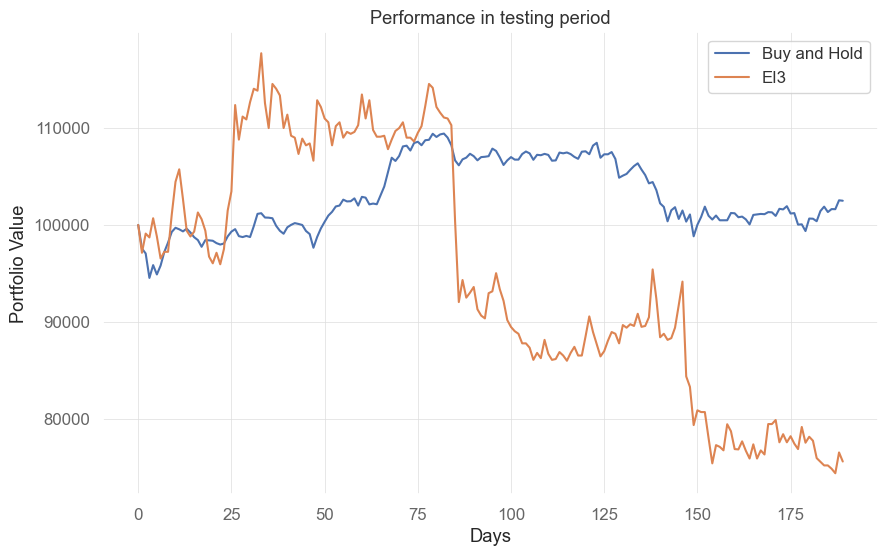

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(UBAH_results["test"], label="Buy and Hold")
plt.plot(EI3_results["test"], label="EI3")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in testing period")
plt.legend()

plt.show()